# Home Credit Default Risk LDA

-------------------------------------------------------------------------
        Noélie DEBS, Alexandre DELACHE, Guillaume DURIEU, Matthieu MERINIS
--------------------------------------------------------------------------

##  Charging the datasets and librairies

In [1]:
#import plotly 
#import plotly.plotly as py
#import plotly.graph_objs as go

import matplotlib.pyplot as plt
import seaborn as sns



#Scikit learn librairies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale

import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
df=pd.read_csv('application_train.csv')
df_bureau=pd.read_csv('bureau.csv')
dftmp= pd.read_csv('application_train.csv')

# Exploration des données

On affiche les dimensions de la base 'application_train.csv'

In [3]:
df.shape

(307511, 122)

On affiche les 10 premiers elements de la base de donnée.

In [4]:
df.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Regardons le nombre de colonne de chaque type.

In [5]:
df.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

On affiche maintenant un graphique de la répartition de la target (le defaut de paiement).

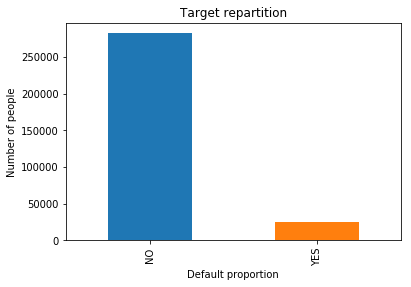

In [6]:
fig11=plt.figure()
ax11=plt.axes()
the_target = dftmp['TARGET']
the_target.replace(to_replace=[1,0], value= ['YES','NO'], inplace = True)
plt.title('Target repartition')
ax11 = ax11.set(xlabel='Default proportion', ylabel='Number of people')
the_target.value_counts().plot.bar()
plt.show()

La répartition de la target n'est pas équilibrée. Il y a environ 8% des individus qui ont fait défaut. Cette distribution sera à prendre en compte lors de l'analyse de nos résultats.

Ce jeu de donnée est constitué de plusieurs bases de données. Nous allons donc joindre notre base de donnée à la base de donnée 'bureau.csv'. L'ID que nous utilisons pour joindre les bases est 'SK_ID_CURR' car c'est la seule colonne commune aux deux tables.

In [7]:
print(df.shape)
df=df.merge(right=df_bureau,how='inner', on='SK_ID_CURR')
print(df.shape)

(307511, 122)
(1465325, 138)


Apres la fusion des bases, nous avons maintenant 138 colonnes et 1 465 325 lignes. Verifions qu'il n'y a pas d'invidus avec une target manquante:

In [8]:
df.TARGET.isnull().sum()

0

On affiche également le nombre de colonnes par types.

In [9]:
df.dtypes.value_counts()

float64    73
int64      46
object     19
dtype: int64

On vérifie que la nouvelle distribution de la target est consistante.

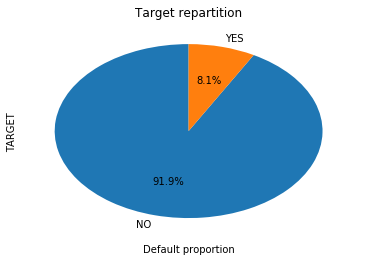

In [10]:
fig11=plt.figure()
ax11=plt.axes()
the_target = dftmp['TARGET']
the_target.replace(to_replace=[1,0], value= ['YES','NO'], inplace = True)
plt.title('Target repartition')
ax11 = ax11.set(xlabel='Default proportion', ylabel='Number of people')
the_target.value_counts().plot.pie(startangle=90, autopct='%1.1f%%')
plt.show()

Afin d'avoir une meilleure visibilité de la data nous souhaitons crées des graphiques de nos données.

Nous avons écrit une fonction afin de d'afficher la valeur de chaque individu pour chaque catégorie.

In [11]:
#A function to print every graph with the ID as 
def print_all_values():
    df1=df.drop('SK_ID_CURR',axis=1)
    cols=df1.columns
    for col in cols:
        if (df[col].dtypes !='object'):

            fig1=plt.figure()
            ax1=plt.axes()
            plt.scatter(df[[col]],df.SK_ID_CURR,alpha=1,s=0.5)
            plt.title(col)
            ax1 = ax1.set(xlabel=col, ylabel='ID')
            plt.show()
            
            
#print_all_values()

On remarque qu'il y a des valeurs aberantes, par exemple pour les salaires. Voici-ci dessous un graphique avec et sans la  valeur aberante. Ces valeurs réduisent grandement la precision des prédiction des algorithmes de machine learning, principalement la regression logistique.

C:\Users\merin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


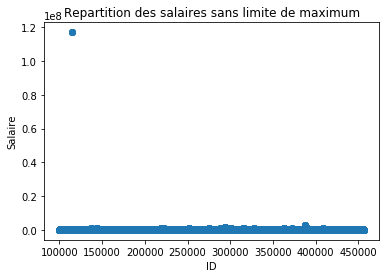

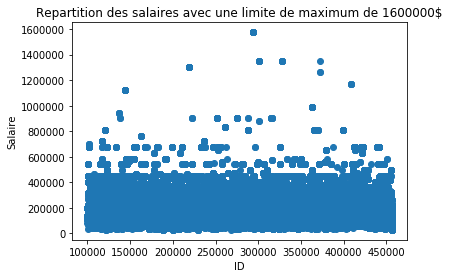

In [12]:
#Plotting the income of the people making default
df1=df[df.AMT_INCOME_TOTAL <1600000.0]
df1=df1[df.TARGET ==1 ]
df2=df[df.TARGET ==1 ]


fig2=plt.figure()
ax2=plt.axes()
plt.scatter(df2.SK_ID_CURR ,df2.AMT_INCOME_TOTAL ,alpha=1)
plt.title('Repartition des salaires sans limite de maximum')
ax2 = ax2.set(xlabel='ID', ylabel='Salaire')

fig1=plt.figure()
ax1=plt.axes()
plt.scatter(df1.SK_ID_CURR ,df1.AMT_INCOME_TOTAL ,alpha=1)
plt.title('Repartition des salaires avec une limite de maximum de 1600000$')
ax1 = ax1.set(xlabel='ID', ylabel='Salaire')
plt.show()

On peut donc supprimer cette valeur. On fait de meme pour les autres catégories où cela est le cas.

Nous ne pouvons malheuresement pas utiliser la fonction que l'on avait codé pour la précédente base de donnée car nos ordinateurs ne sont pas assez puissants pour effectuer les calculs dans un temps raisonnable. Nous nous contenterons donc d'une suppression manuelle.

In [13]:
print(df.shape)
df=df[df.AMT_INCOME_TOTAL <1750000.0]
df=df[df.CNT_FAM_MEMBERS <12]
df=df[df.OBS_30_CNT_SOCIAL_CIRCLE <50]
df=df[df.DEF_30_CNT_SOCIAL_CIRCLE <20]
df=df[df.OBS_60_CNT_SOCIAL_CIRCLE <55]
df=df[df.DEF_60_CNT_SOCIAL_CIRCLE <15]
df=df[df.AMT_REQ_CREDIT_BUREAU_HOUR <4]
df=df[df.AMT_REQ_CREDIT_BUREAU_QRT <55]
df=df[df.CNT_CREDIT_PROLONG <6.5]
print(df.shape)

(1465325, 138)
(1460966, 138)


Ensuite, on remplace les valeurs manquantes lorsque cela est possible.

In [14]:
df['OWN_CAR_AGE']=df['OWN_CAR_AGE'].fillna(0)


cols=['APARTMENTS_AVG','BASEMENTAREA_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI']        
for i in df.index:
    if (df.loc[i,'FLAG_OWN_REALTY'] =='N'):
        for col in cols:
            df.set_value(i,col,0)
            

df['NAME_TYPE_SUITE']=df['NAME_TYPE_SUITE'].fillna('Unknown')
df['OCCUPATION_TYPE']=df['OCCUPATION_TYPE'].fillna('Unknown')

C:\Users\merin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


Par exemple, pour la variable 'OWN_CAR_AGE', lorsque la personne n'a pas de voiture (le drapeau 'OWN_CAR' est à zéro), l'age de sa voiture est remplie avec 'Nan'. On remarque que la solution optimale et de remplacer les valeurs d'age manquantes par 0 (cf. graph ci-dessous).

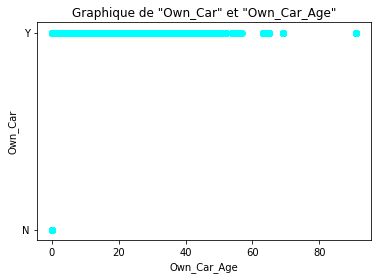

In [15]:
fig1=plt.figure()
ax1=plt.axes()
plt.scatter(df.OWN_CAR_AGE,df.FLAG_OWN_CAR,color='cyan')
plt.title('Graphique de "Own_Car" et "Own_Car_Age"')
ax1 = ax1.set(xlabel='Own_Car_Age', ylabel='Own_Car')
plt.show()

On en profite aussi pour remplacer la variable 'DAYS_BIRTH' par l'age de la personne pour plus de lisibilité.

In [16]:
df['DAYS_BIRTH'] = df['DAYS_BIRTH']/(-365)
df=df.rename(columns={'DAYS_BIRTH':'AGE'})
df.AGE.describe()

count    1.460966e+06
mean     4.472030e+01
std      1.141695e+01
min      2.051781e+01
25%      3.544658e+01
50%      4.375616e+01
75%      5.428493e+01
max      6.904384e+01
Name: AGE, dtype: float64

Nous avons crée une fonction qui créer un dataframe avec le nom de la catégorie et le pourcentage de valeurs manquantes. 

In [17]:
#Dataset of missing values order by percentage
def nan_count_df(df_to_print):
    
    nan_count = df_to_print.isnull().sum()

    nan_percentage = (nan_count / len(df))*100

    nan_df=pd.concat([nan_percentage], axis=1)
    nan_df=nan_df.rename(columns={0:'Percentage'})
    nan_df=nan_df[nan_df.Percentage != 0]
    nan_df = nan_df.sort_values(by='Percentage',ascending=False)
    return nan_df

nan_df=nan_count_df(df)
nan_df

,Percentage
AMT_ANNUITY_y,77.060520
FONDKAPREMONT_MODE,66.589092
AMT_CREDIT_MAX_OVERDUE,64.736072
YEARS_BUILD_MEDI,64.589525
YEARS_BUILD_AVG,64.589525
YEARS_BUILD_MODE,64.589525
EXT_SOURCE_1,53.466268
WALLSMATERIAL_MODE,48.323575
HOUSETYPE_MODE,47.707955
COMMONAREA_MEDI,46.885212


Il y a des colonnes ou plus de 70% des valeurs sont manquantes. Nous ne pouvons pas remplacer ces valeurs par des moyennes ou des médiannes car elles ne seraient pas représentatives des données. Nous ne pouvons pas non plus supprimer les lignes avec des valeurs manquantes car nous supprimerions 70% des valeurs de notre base de donnée. La seule solution ici est de supprimer les colonnes avec trop de valeurs manquantes. Pour cela nous avons crée une fonction qui, à partir du dataframes précédent, supprime les colonnes avec un pourcentage de valeur manquantes supérieur à celui donné en paramètre.

In [18]:
print(df.shape)
def delete_columns(df_transformed,df_missing_values,max_value):
        cols=df_missing_values[df_missing_values['Percentage']>=max_value].T.columns
        for col in cols:
            df_transformed=df_transformed.drop(col, axis=1)
        
        return df_transformed
df=delete_columns(df,nan_df,62)
print(df.shape)

(1460966, 138)
(1460966, 132)


Nous avons donc à présent 132 colonnes au lieu de 138.

# Encodage des catégories

Regardons le nombre de catégories pour chaque colonne de type 'objet'.

In [19]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                8
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               19
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
CREDIT_ACTIVE                  4
CREDIT_CURRENCY                4
CREDIT_TYPE                   15
dtype: int64

On supprime les colonnes qui ne se sont pas avérées utiles à la prediction.

In [20]:
#useless columns
columns_to_drop = ['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','NAME_TYPE_SUITE','FLAG_MOBIL','FLAG_CONT_MOBILE']
df=df.drop(columns=columns_to_drop)

Maintenant, nous allons encodé les colonnes des types 'object' de deux manières différentes:

1. Pour les colonnes de 2 catégories, on les encode avec 1 et 0.
2. Pour celles qui ont plus de 2 catégories, on les encode avec la methode des OneHotEncoding pour réduire le biais induit

##### 1. Les colonnes à deux catégories

In [21]:
#Encodage pour 2 catégories
def two_cat_encoding(df_to_transf):
    le = LabelEncoder()

    for cols in df_to_transf:
        if df_to_transf[cols].dtype == 'object':
            if len(list(df_to_transf[cols].unique())) == 2:
                le.fit(df_to_transf[cols])
                df_to_transf[cols] = le.transform(df_to_transf[cols])
    return df_to_transf
df=two_cat_encoding(df)

##### 2. Les colonnes à plus de 2 catégories

On utilise la methode get_dummies() pour faire le oneHotEncoding. Elle séparera donc les variables en utilisant des flags.

In [22]:
df = pd.get_dummies(df)

In [23]:
print('Les nouvelles dimensions du dataframes sont :\n', df.shape)

Les nouvelles dimensions du dataframes sont :
 (1460966, 252)


---------------------------------------------------------------------------------------------
#                  Algorithmes de Machine Learning
----------------------------------------------------------------------------------------------

On commence par supprimer les valeurs nulles que nous n'avons pas réussi à remplacer.

In [24]:
df_columns=df.columns
df=df.dropna()

#### Spliting the data between training and testing

In [25]:
X =df.drop('TARGET',axis=1)
y = df['TARGET']  

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [26]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(fit_intercept=True,intercept_scaling=1,max_iter=200,tol=0.0001,random_state=None)
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Score et erreur

In [27]:
#ERROR
error = (1 - logisticRegr.score(X_test, y_test))*100
print('Score  = ',logisticRegr.score(X_test, y_test)*100, '%','\nErreur = %f' % error, '%')

Score  =  93.90050697084918 % 
Erreur = 6.099493 %


In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis(n_components=None)
lda.fit(X_train, y_train)

C:\Users\merin\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

#### Score et erreur

In [29]:
#ERROR
error = (1 - lda.score(X_test, y_test))*100
print('Score  = ',lda.score(X_test, y_test)*100, '%','\nErreur = %f' % error, '%')

Score  =  93.76848331220955 % 
Erreur = 6.231517 %


## Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300, oob_score=True, random_state=0)
rf.fit(X_train,y_train)

C:\Users\merin\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=True, random_state=0, verbose=0, warm_start=False)

#### Score et erreur

In [31]:
error = (1 - rf.score(X_test, y_test))*100
print('Score  = ',rf.score(X_test, y_test)*100, '%','\nErreur = %f' % error, '%')

Score  =  98.78538234051541 % 
Erreur = 1.214618 %


## Tree Decision Classifier

In [32]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

#### Score et erreur

In [33]:
error = (1 - clf.score(X_test, y_test))*100
print('Score  = ',clf.score(X_test, y_test)*100, '%','\nErreur = %f' % error, '%')

Score  =  98.05661174482468 % 
Erreur = 1.943388 %


# Cross Validation

On fini par faire une cross-validation

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = logisticRegr.predict(X_test)

print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

             precision    recall  f1-score   support

          0       0.94      1.00      0.97     17781
          1       0.00      0.00      0.00      1155

avg / total       0.88      0.94      0.91     18936



[[17781     0]
 [ 1155     0]]


C:\Users\merin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [35]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator = logisticRegr , 
                         X=X_train, 
                         y=y_train, 
                         cv=3)
print('Cross-validation scores de réussite: %s' %(scores))
print('CV précision: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

Cross-validation scores de réussite: [0.9384134  0.93845057 0.93844813]
CV précision: 0.938 +/- 0.000


# Résultats

Après entrainement de nos algorithmes, nous avons obtenu les résultats suivants sur le jeu de test:

In [37]:
print('Taux de réussite par modèle:\n\nRégression Logistique:',logisticRegr.score(X_test, y_test)*100,'%','\n\nLDA:',lda.score(X_test, y_test)*100,'%','\n\nRandom Forest Classifier:',rf.score(X_test, y_test)*100,'%','\n\nDecision Tree Classifier:',clf.score(X_test, y_test)*100,'%')

Taux de réussite par modèle:

Régression Logistique: 93.90050697084918 % 

LDA: 93.76848331220955 % 

Random Forest Classifier: 98.78538234051541 % 

Decision Tree Classifier: 98.05661174482468 %
